# Logistic Regression

In [1]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display max columns, max rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
from sklearn.preprocessing import StandardScaler
import math

In [4]:
data_df = pd.read_csv("Logistic_Regression.csv")

In [5]:
data_df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Times_Pregnant  392 non-null    int64  
 1   Plasma_Glucose     392 non-null    int64  
 2   Diastolic_BP       392 non-null    int64  
 3   Triceps            392 non-null    int64  
 4   Insulin            392 non-null    int64  
 5   BMI                392 non-null    float64
 6   Age                392 non-null    int64  
 7   Diabetes           392 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


In [7]:
x = data_df.drop(['Diabetes'], axis=1)

In [8]:
y = data_df['Diabetes']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [10]:
scaller = MinMaxScaler()

In [11]:
features = list(x.columns)

In [12]:
x_train[features] = scaller.fit_transform(x_train[features])

In [13]:
x_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
169,0.529412,0.685714,0.60,0.509434,0.187726,0.327198,0.285714
265,0.352941,0.521429,0.75,0.000000,0.374248,0.028630,0.928571
386,0.058824,0.464286,0.60,0.603774,0.070999,0.425358,0.166667
241,0.352941,0.700000,0.60,0.641509,0.150421,0.570552,0.142857
249,0.058824,0.592857,0.40,0.641509,0.559567,0.460123,0.000000


In [17]:
x_train_sm = sm.add_constant(x_train)
lag_reg = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())

In [18]:
reg = lag_reg.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.11
Date:                Thu, 15 Jan 2026   Deviance:                       244.22
Time:                        18:18:03   Pearson chi2:                     264.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3196
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1878      0.756     -6.864      0.000      -6.669      -3.706
No_Times_Pregnant     1.5575      1.124      1.386      0.166      -0.645       3.760
Plasma_Glucose        5.7310      0.980      5.851      0.000       3.811       7.651
Diastolic_BP         -0.4826      1.125     -0.429      0.668      -2.687       1.722
Triceps               0.6859      1.027      0.668      0.504      -1.326       2.698
Insulin              -0.8890      1.222     -0.728      0.467      -3.283       1.505
BMI                   3.1620      1.470      2.151      0.031       0.281       6.043
Age                   1.5469      0.953      1.624      0.104      -0.321       3.414
=====================================================================================
"""

In [20]:
y_train_pred = reg.predict(x_train_sm)

In [21]:
y_train_pred[:10]

169    0.718327
265    0.306302
386    0.316249
241    0.804626
249    0.378940
178    0.876569
362    0.219016
19     0.943501
26     0.282007
297    0.087435
dtype: float64

In [22]:
y_train_pred = y_train_pred.values.reshape(-1)

In [24]:
y_train_pred[:60]

array([0.71832746, 0.30630171, 0.3162486 , 0.80462559, 0.3789398 ,
       0.87656871, 0.2190164 , 0.94350127, 0.28200652, 0.08743486,
       0.14764385, 0.16527821, 0.30906389, 0.41171322, 0.82679199,
       0.81554245, 0.14738412, 0.74375919, 0.40918196, 0.89308788,
       0.06883617, 0.17738789, 0.04926321, 0.6122752 , 0.0943883 ,
       0.1084547 , 0.24054703, 0.03635655, 0.80362147, 0.15108311,
       0.40020813, 0.04511563, 0.21627517, 0.8637451 , 0.3889259 ,
       0.07721608, 0.06472613, 0.68376574, 0.67505686, 0.26959776,
       0.54570272, 0.69833863, 0.406031  , 0.39835021, 0.48798387,
       0.18772429, 0.92316023, 0.16086158, 0.89538126, 0.2911382 ,
       0.20466695, 0.05827124, 0.14831805, 0.15076204, 0.38278194,
       0.77803361, 0.03149437, 0.64791546, 0.04031377, 0.86849759])

In [25]:
y_train_pred_final = pd.DataFrame({'diabetes' : y_train.values,
                                   'diabetes_prob' : y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,diabetes,diabetes_prob,ID
0,1,0.718327,169
1,0,0.306302,265
2,0,0.316249,386
3,0,0.804626,241
4,0,0.378940,249


In [26]:
y_train_pred_final['predicted'] = y_train_pred_final['diabetes_prob'].map(lambda x: 1 if x>0.5 else 0)

In [27]:
y_train_pred_final.head()

,diabetes,diabetes_prob,ID,predicted
0,1,0.718327,169,1
1,0,0.306302,265,0
2,0,0.316249,386,0
3,0,0.804626,241,1
4,0,0.378940,249,0


In [31]:
confussion = metrics.confusion_matrix(y_train_pred_final.diabetes, y_train_pred_final.predicted)

In [34]:
metrics.accuracy_score(y_train_pred_final.diabetes, y_train_pred_final.predicted)

0.7846715328467153

In [42]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['vif'] = [variance_inflation_factor(x_train.values, 1) for i in range(x_train.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by='vif', ascending= False)
vif

,Features,vif
0,No_Times_Pregnant,8.6
1,Plasma_Glucose,8.6
2,Diastolic_BP,8.6
3,Triceps,8.6
4,Insulin,8.6
5,BMI,8.6
6,Age,8.6


In [43]:
confussion

array([[161,  21],
       [ 38,  54]], dtype=int64)

In [44]:
#Accuracy 
accuracy = (confussion[1,1]+ confussion[0,0])/(confussion[1,1]+ confussion[0,0]+confussion[1,0]+ confussion[0,1])
accuracy

0.7846715328467153

In [45]:
#sensitivity = TP/(TP+FN)
sensitivity = confussion[1,1]/(confussion[1,1]+confussion[1,0])
sensitivity

0.5869565217391305

In [46]:
# Specificity = TN/(TN+FP)
specificity = confussion[0,0]/(confussion[0,0]+confussion[0,1])
specificity

0.8846153846153846

In [47]:
# True +ve value = TP/(TP+FN)
true_ve_value = confussion[1,1]/(confussion[1,1]+confussion[1,0])
true_ve_value

0.5869565217391305

In [48]:
# False +ve value = FP/(TN+FP)
false_ve_value = confussion[0,1]/(confussion[0,0]+confussion[0,1])
false_ve_value

0.11538461538461539

In [49]:
# precision = TP/(TP+FP)
precision = confussion[1,1]/(confussion[1,1]+confussion[0,1])
precision

0.72

In [50]:
# recall = TP/(TP+FN)
precision = confussion[1,1]/(confussion[1,1]+confussion[1,0])
precision

0.5869565217391305

In [51]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label="RoC Curve(area =0.2f)"%auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False +ve Rate')
    plt.ylabel('True +ve Rate')
    plt.title('Receiver Operating Characteristic example')
    plt.legend(["Lower right"])
    plt.show()
    return None

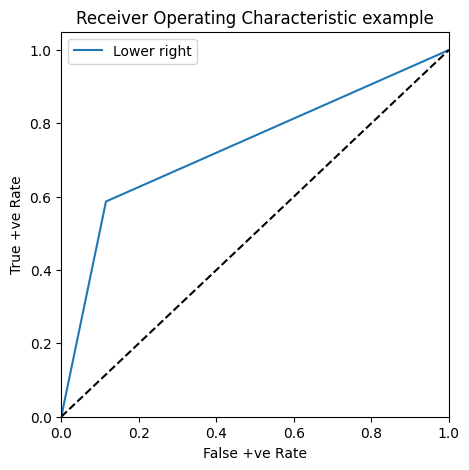

In [52]:
draw_roc(y_train_pred_final.diabetes, y_train_pred_final.predicted)

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.diabetes, y_train_pred_final.predicted, drop_intermediate=True)

In [54]:
fpr, tpr, thresholds

(array([0.        , 0.11538462, 1.        ]),
 array([0.        , 0.58695652, 1.        ]),
 array([inf,  1.,  0.]))

In [65]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [66]:
y_train_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   diabetes       274 non-null    int64  
 1   diabetes_prob  274 non-null    float64
 2   ID             274 non-null    int64  
 3   predicted      274 non-null    int64  
 4   0.0            274 non-null    int64  
 5   0.1            274 non-null    int64  
 6   0.2            274 non-null    int64  
 7   0.3            274 non-null    int64  
 8   0.4            274 non-null    int64  
 9   0.5            274 non-null    int64  
 10  0.6            274 non-null    int64  
 11  0.7            274 non-null    int64  
 12  0.8            274 non-null    int64  
 13  0.9            274 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.1 KB


In [67]:
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.diabetes_prob.map(lambda x: 1 if x>i else 0)

In [68]:
y_train_pred_final.head()

,diabetes,diabetes_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.718327,169,1,1,1,1,1,1,1,1,1,0,0
1,0,0.306302,265,0,1,1,1,1,0,0,0,0,0,0
2,0,0.316249,386,0,1,1,1,1,0,0,0,0,0,0
3,0,0.804626,241,1,1,1,1,1,1,1,1,1,1,0
4,0,0.378940,249,0,1,1,1,1,0,0,0,0,0,0


In [69]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

In [70]:
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [71]:
for i in num:
    cm1 = metrics.confusion_matrix( y_train_pred_final.diabetes,  y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+ cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

In [72]:
cutoff_df.head()

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.335766,1.000000,0.000000
0.1,0.1,0.562044,0.956522,0.362637
0.2,0.2,0.733577,0.902174,0.648352
0.3,0.3,0.762774,0.782609,0.752747
0.4,0.4,0.791971,0.684783,0.846154


<Axes: xlabel='prob'>

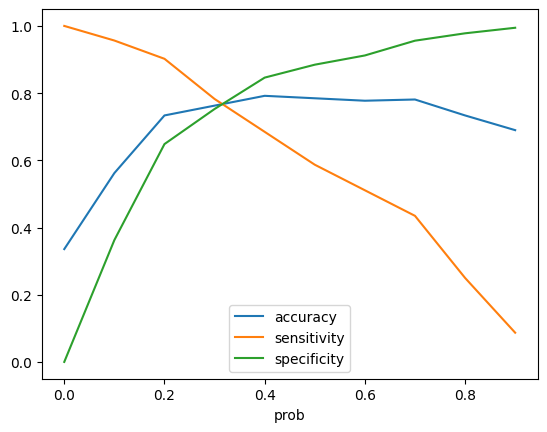

In [73]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.diabetes_prob.map(lambda x: 1 if x>0.4 else 0)
y_train_pred_final.head()

,diabetes,diabetes_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.718327,169,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.306302,265,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.316249,386,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.804626,241,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.378940,249,0,1,1,1,1,0,0,0,0,0,0,0


In [89]:
metrics.accuracy_score(y_train_pred_final.diabetes, y_train_pred_final.final_predicted)

0.791970802919708

In [90]:
confusion = metrics.confusion_matrix(y_train_pred_final.diabetes, y_train_pred_final.final_predicted)

In [91]:
confusion

array([[154,  28],
       [ 29,  63]], dtype=int64)

In [92]:
TP= confussion[1,1]
TN= confussion[0,0]
FP= confussion[0,1]
FN= confussion[1,0]

In [94]:
### prcesion
confusion[1,1]/(confusion[0,1] + confusion[1,1])

0.6923076923076923

In [95]:
precision_score(y_train_pred_final.diabetes, y_train_pred_final.final_predicted)

0.6923076923076923

In [96]:
recall_score(y_train_pred_final.diabetes, y_train_pred_final.final_predicted)

0.6847826086956522

In [99]:
p,r, threshold = precision_recall_curve(y_train_pred_final.diabetes, y_train_pred_final.predicted)

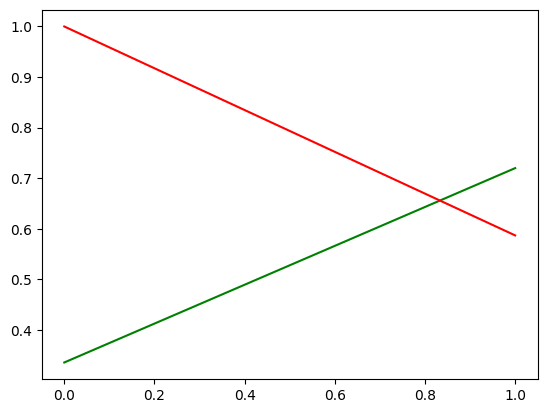

In [100]:
plt.plot(threshold, p[:-1], 'g-')
plt.plot(threshold, r[:-1], 'r-')

In [101]:
x_test.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
124,11,155,76,28,150,33.3,51
140,0,107,62,30,74,36.6,25
276,8,100,74,40,215,39.4,43
252,4,125,70,18,122,28.9,45
326,1,100,74,12,46,19.5,28


In [102]:
x_test[features] = scaller.fit_transform(x_test[features])

In [103]:
x_test.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
124,0.846154,0.669231,0.634146,0.339623,0.186301,0.3475,0.500000
140,0.000000,0.300000,0.463415,0.377358,0.082192,0.4300,0.066667
276,0.615385,0.246154,0.609756,0.566038,0.275342,0.5000,0.366667
252,0.307692,0.438462,0.560976,0.150943,0.147945,0.2375,0.400000
326,0.076923,0.246154,0.609756,0.037736,0.043836,0.0025,0.116667


In [105]:
x_test_sm = sm.add_constant(x_test[features])
y_test_pred = reg.predict(x_test_sm)

In [106]:
y_test_pred[:10]

124    0.831882
140    0.114704
276    0.305509
252    0.245142
326    0.022395
136    0.313733
369    0.130083
132    0.565436
387    0.780972
174    0.034779
dtype: float64

In [107]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [108]:
y_pred_1.head()

,0
124,0.831882
140,0.114704
276,0.305509
252,0.245142
326,0.022395


In [109]:
y_test_df = pd.DataFrame(y_test)
y_test_df['CustId'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [110]:
y_pred_final.head()

,Diabetes,CustId,0
0,1,124,0.831882
1,1,140,0.114704
2,1,276,0.305509
3,1,252,0.245142
4,0,326,0.022395


In [111]:
y_pred_final = y_pred_final.rename(columns = {0: 'diabetic_prob'})

In [112]:
y_pred_final.head()

,Diabetes,CustId,diabetic_prob
0,1,124,0.831882
1,1,140,0.114704
2,1,276,0.305509
3,1,252,0.245142
4,0,326,0.022395


In [113]:
y_pred_final = y_pred_final.reset_index()

In [118]:
y_pred_final = y_pred_final[['CustId', 'Diabetes', 'diabetic_prob']]
y_pred_final['final_predicted'] = y_pred_final.diabetic_prob.map(lambda x: 1 if x >0.42 else 0)

In [119]:
y_pred_final.head()

,CustId,Diabetes,diabetic_prob,final_predicted
0,124,1,0.831882,1
1,140,1,0.114704,0
2,276,1,0.305509,0
3,252,1,0.245142,0
4,326,0,0.022395,0


In [120]:
metrics.accuracy_score(y_pred_final.Diabetes, y_pred_final.final_predicted)

0.7627118644067796

In [122]:
confussion = metrics.confusion_matrix(y_pred_final.Diabetes, y_pred_final.final_predicted)

In [123]:
confussion

array([[68, 12],
       [16, 22]], dtype=int64)

In [124]:
# sensitivity
TP/float(TP+FN)

0.5869565217391305

In [125]:
# specificity
TN/float(TN+FP)

0.8846153846153846

### Gradient Descent for Logistics Regression

In [158]:
data_df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [176]:
x = data_df.drop(['Diabetes'], axis=1)
y = data_df['Diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

In [177]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        self.cost_history = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        """Cross-entropy loss"""
        m = len(y)
        return - (1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

    def fit(self, X, y):
        """Train model using gradient descent"""
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)

            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self.cost(h, y))

    def predict(self, X):
        """Make predictions"""
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)

In [178]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [180]:
# Train and Evaluate the Model
model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000)
model.fit(x_train, y_train)

# Evaluate accuracy
predictions = model.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.73


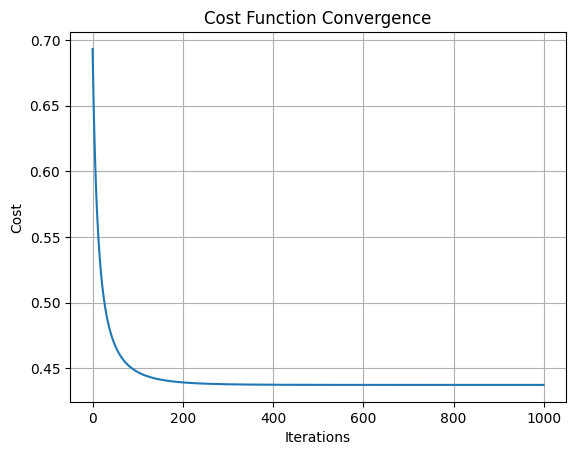

In [181]:
## Visualize Cost Function Convergence
plt.plot(model.cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()